In [1]:
import pandas as pd
import numpy as np
import os
import os.path as op
import copy
import matplotlib.pyplot as plt

path = '../../data/kaggle-houseprice'
XS = []
names = ['train_MinMaxScaledClean','train_MinMaxScaledCleanedOutlier','train_RobustScaledClean']
for sn in names:
    XS.append(pd.read_csv(op.join(path,sn), index_col=0))
    
y = pd.read_csv(op.join(path,'train_label'))['SalePrice']

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
YP = []
YP_valid = []
for X in XS:
    
    regr = RandomForestRegressor(random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)
    regr.fit(X,y)
    score = regr.score(X_valid, y_valid)
    print(score)
    y_pred = regr.predict(X_valid)
    YP.append(y_pred)
    YP_valid.append(y_valid)

0.9863778532828412
0.9814649923462199
0.9870948013888958


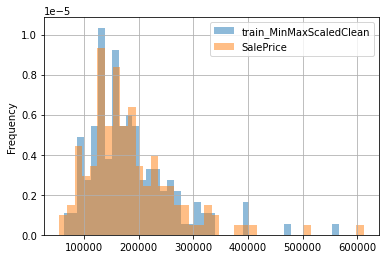

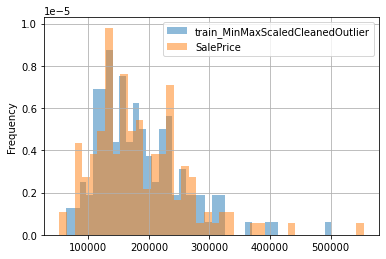

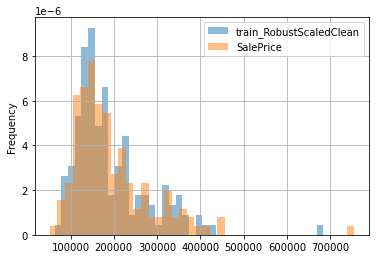

In [3]:
 for i, y_pred in enumerate(YP):
    pd.DataFrame(y_pred, columns = [names[i]]).plot.hist(alpha=0.5,bins = 40, density = True)
    YP_valid[i].plot.hist(alpha=0.5, bins=40, density=True)
    plt.grid(True)
    plt.legend()

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
YP = []
YP_valid = []
for X in XS:
    
    regr = SVR(kernel="rbf", C=100, gamma='scale', epsilon=0.1, tol =1e-05)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)
    regr.fit(X,y)
    score = regr.score(X_valid, y_valid)
    print(score)

    y_pred = regr.predict(X_valid)
    YP.append(y_pred)
    YP_valid.append(y_valid)

0.0277623484989874
0.033074426370253374
-0.06226798438004799


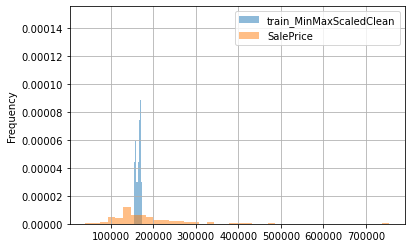

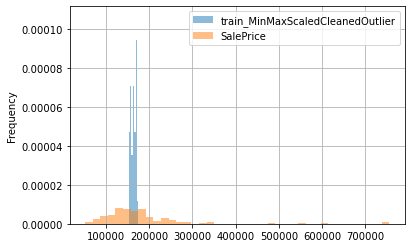

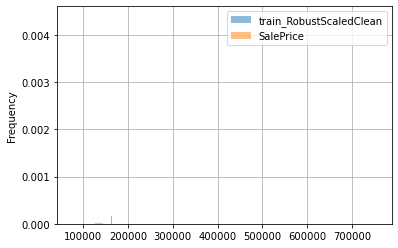

In [5]:
 for i, y_pred in enumerate(YP):
    pd.DataFrame(y_pred, columns = [names[i]]).plot.hist(alpha=0.5,bins = 40, density = True)
    YP_valid[i].plot.hist(alpha=0.5, bins=40, density=True)
    plt.grid(True)
    plt.legend()

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
YP = []
YP_valid = []
for X in XS:
    
    pars = dict(
        random_state=42,
        max_iter=2000, 
        hidden_layer_sizes=(100,100,100,100,100), 
        learning_rate = 'adaptive',
        alpha = 1.,
    )
    regr = MLPRegressor(**pars)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)
    regr.fit(X,y)
    score = regr.score(X_valid, y_valid)
    print(score)

    y_pred = regr.predict(X_valid)
    YP.append(y_pred)
    YP_valid.append(y_valid)

0.9865335614584926
0.9779097200414509
0.7182470313303013


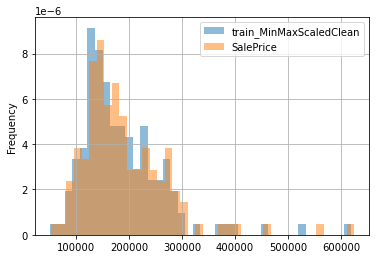

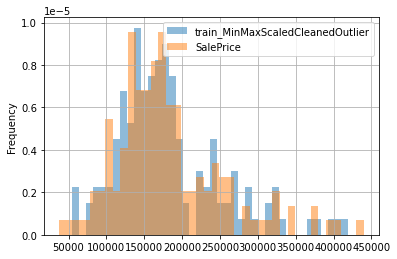

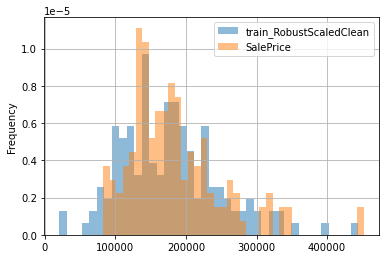

In [7]:
 for i, y_pred in enumerate(YP):
    pd.DataFrame(y_pred, columns = [names[i]]).plot.hist(alpha=0.5,bins = 40, density = True)
    YP_valid[i].plot.hist(alpha=0.5, bins=40, density=True)
    plt.grid(True)
    plt.legend()